#Actividad 
# Momento de Retroalimentación: Módulo 2 Implementacion de un modelo de Deep Learning (Portafolio Implementcion)

Fecha Inicio del Trabajo:  27/08/2022


Fecha de Finalizado: 11/02/2022 (primera entrega)


Nombre: Roberto Valdez

Matricula: A01746863

Instrucciones:


Implementación de un modelo de deep learning.

1. Crea un repositorio de github para este proyecto.


2.  Selecciona un problema y consigue un dataset para resolver dicho problema. 

3.  Implementa una arquitectura de deep learning para solucionar el problema. Lo que se busca es que apliques correcta y efectivamente las técnicas vistas en el módulo.

4.  Analiza los resultados de tu modelo set de pruebas y validación. 

5.  Mejora tu modelo usando técnicas de regularización, ajustando hiper parámetros, modificando la arquitectura de tu modelo o buscando otro modelo. 

6.  Documenta y explica cuáles son los cambios que funcionaron y por qué funcionaron. 

7.  Prueba tu implementación con un set de datos y realiza algunas predicciones. Las predicciones las puedes correr en consola o las puedes implementar con una interfaz gráfica apoyándote en los visto en otros módulos.

8.  Después de la entrega intermedia se te darán correcciones que puedes incluir en tu entrega final.




## Problema Selecionado: procesamiento y arreglo de prediccion por medio de data augmentation


In [1]:
# Librerias
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow import keras 
from keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os, shutil, pathlib
%matplotlib inline
# Librerias de conexion:
from google.colab import drive
from google.colab import files

In [2]:
# revision de la version de tensorflow
print(tf.__version__) # 2.9.2

2.9.2


In [4]:
# Conexion con drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Data"
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Data
Alcohol_Sales.csv                             IMDB-Movie-Data.csv
Animals.csv                                   iris.data
annotations/                                  iris.names
annotations.tar.gz                            kaggle.json
archive/                                      my_figure.png
Automobile.csv                                oxford_segmentation.keras
bodyfat.csv                                   purchases.csv
cars-vs-bikes.log                             purchases.json
convnet_from_scratch/                         sampleSubmission.csv
convnet_from_scratch_with_augmentation/       test1.zip
convnet_from_scratch_with_augmentation.keras  titanic.csv
digits/                                       train/
dogs-vs-cats.zip                              train_images2/
fotos/                                        train.zip
im

# Seleccion de Dataset

Ahora bien, ya teniendo la conexion con google drive, en kaggle buscamos un dataset de imagenes que nos apoye en clasificar  para luego procesar las imagenes dentro del dataset selecionado.

En este caso selecionamos un dataset usando en clase de identificacion de vehiculos, especialmente carros y motocicletas, la cual contiene  un conjunto de entrenamiento con imágenes de  uno  o mas vehiculos en una sola foto sin labels automaticos. Cada imagen tiene un nombre de archivo que es su identificación única. El conjunto de datos se comprende aproximadamente una cantidad de +800 imagenes entre  ambos tipos de vehiculos.

Nota:

Este dataset no esta dentro de las competencias activas de kaggle hasta el momento (1/11/2022), donde se puede encontrar este dataset es en el siguiente link:

https://www.kaggle.com/datasets/devkhant24/cars-and-bikes-prediction

 Ya descargado , extraemos el el zip del dataset y set de entrenamiento

La estructura de los folders es la siguiente:


```
archive/
...Bikes/
......train/              
...Cars/
......train/         
```




Teniendo en cuenta lo anterior, las imagenes seran extraidas de la carpeta de train para la creacion de los nuevos sets:

* train
* test
* validation

los cuales tendran la siguiente estructura:
```
train_images/
...train/
......Bikes/
......Cars/              
...test/
......Bikes/
......Cars/   
...validation/
......Bikes/
......Cars/       
```



In [ ]:
# Checamos si  esta presente en el drive 
%ls

Alcohol_Sales.csv                             iris.data
Animals.csv                                   iris.names
annotations/                                  kaggle.json
annotations.tar.gz                            my_figure.png
archive/                                      oxford_segmentation.keras
Automobile.csv                                purchases.csv
bodyfat.csv                                   purchases.json
cars-vs-bikes.log                             sampleSubmission.csv
convnet_from_scratch/                         test1.zip
convnet_from_scratch_with_augmentation/       titanic.csv
convnet_from_scratch_with_augmentation.keras  train/
digits/                                       train_images/
dogs-vs-cats.zip                              train_images1/
fotos/                                        train_images2/
images.tar.gz                                 train.zip
IMDB-Movie-Data.csv                           weatherHistory.csv


In [5]:
# Direcciones de directorios de imagenes 
original_dir = pathlib.Path("archive") # direccion original para la agregacion 
                                       # de las subsets con las imagenes 
                                       # originales
                  
new_base_dir = pathlib.Path("train_images")  # nueva carpeta donde se generaran
                                             # los nuevos subsets

In [6]:

# Funcion para crear el set de entrenamiento 
def make_subset_test(subset_name, start_index, end_index):          
    for category in ("Bikes", "Cars"):
        tra = "train"
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"download ({i}).jpg"
                  for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir/ category/tra/fname,
                            dst=dir /fname)

def make_subset_train_val(subset_name, start_index, end_index):          
    for category in ("Bikes", "Cars"):
        tra = "train"
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"images ({i}).jpg"
                  for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir/ category/tra/fname,
                            dst=dir /fname)

# Llamamos a las funciones 
make_subset_train_val("train", start_index=1, end_index=211) # creacion del set de entrenamiento
make_subset_test("test", start_index=1, end_index=91)  # creacion del set de prueba
make_subset_train_val("validation", start_index=214, end_index=240)  # creacion del set de validacion

Ya una vez obtenidos, los pasamos  directorio imagenes por subset de la siguiente manera:

In [7]:
# Directorio de entrenamiento
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(224, 224),
    batch_size=10)
# Directorio de validacion
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(224, 224),
    batch_size=10)
# directorio de prueba
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(224, 224),
    batch_size=10)

Found 420 files belonging to 2 classes.
Found 52 files belonging to 2 classes.
Found 180 files belonging to 2 classes.


In [8]:
# Checamos en el estan las organizaciones como tambien el labels de las mismas
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (10, 224, 224, 3)
labels batch shape: (10,)


In [9]:
# Extraemos y checamos si realizo de manera correcta el nombrambientod e las clases
class_names = train_dataset.class_names
print(class_names)

['Bikes', 'Cars']


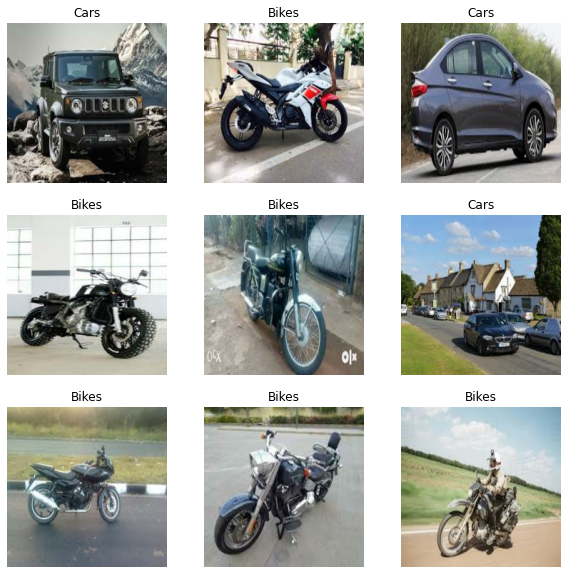

In [10]:
# Probamos el Dataset de entrenamiento
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Construccion del Modelo

Ahora estamos listos para construir una CNN. Optaremos por una arquitectura "clásica", vista en clase,  que consiste en capas de convolución con un kernel de 5 x  5 con funciones de activación de ReLu, intercaladas con una capas de agrupación máxima (MaxPooling) de 2 x 2 por cada 3 capas de convulacion antes de la agrupacion maxima.

La salida consistirá en una 3 capas densas de una unidad con una función de activación ReLu, y la ultima con una funcion de activacion sigmoidea, ya que solo tenemos dos clases posibles (autos vs motocicletas).

Observe las dos primeras capas del modelo. La entrada nos permite especificar las dimensiones de las imágenes de muestra (224 X 224, con 3 canales). También estamos usando una capa de cambio de escala para cambiar los valores de las imágenes a un rango de 0 a 255.

In [11]:
model = keras.Sequential([keras.Input(shape=(224, 224, 3)),
                          layers.Rescaling(1./255),
                          layers.Conv2D(filters=8, kernel_size=(5,5), activation="relu"),
                          layers.Conv2D(filters=8, kernel_size=(5,5), activation = "relu"),
                          layers.Conv2D(filters=16, kernel_size=(5,5), activation = "relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=16, kernel_size=(3,3), activation = "relu"),
                          layers.Conv2D(filters=32, kernel_size=(3,3), activation = "relu"),
                          layers.Conv2D(filters=32, kernel_size=(3,3), activation = "relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Flatten(),
                          layers.Dense(units= 120, activation = "relu"),
                          layers.Dropout(0.1),
                          layers.Dense(units= 90, activation = "relu"),
                          layers.Dense(units= 64, activation = "relu"),
                          layers.Dense(1, activation="sigmoid")])
                          

                          
                         
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 8)       608       
                                                                 
 conv2d_1 (Conv2D)           (None, 216, 216, 8)       1608      
                                                                 
 conv2d_2 (Conv2D)           (None, 212, 212, 16)      3216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 106, 106, 16)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 104, 104, 16)      2320      
                                                        

In [12]:
# Copilacion del Modelo
model.compile(loss="binary_crossentropy",
              #optimizer="rmsprop",
              metrics=["accuracy"])

ya teniendo en modelo compilado, ahora ya esta listo para comenzar a entrenar el modelo con los datos ya preparados, lo cual agregamos la funcion callback para guadar  los mejores pesos del modelo en funcion al valor de perdida de la validacion.

In [13]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=9, # variable arbitraria  (aunque debe ser menor que las epocas usadas en el modelo con data augmentation)
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/9
41/42 [============================>.] - ETA: 0s - loss: 0.7152 - accuracy: 0.4927

42/42 [==============================] - 10s 139ms/step - loss: 0.7155 - accuracy: 0.4952 - val_loss: 0.6717 - val_accuracy: 0.6154
Epoch 2/9
42/42 [==============================] - 2s 40ms/step - loss: 0.5306 - accuracy: 0.7548 - val_loss: 0.8691 - val_accuracy: 0.7500
Epoch 3/9
41/42 [============================>.] - ETA: 0s - loss: 0.4087 - accuracy: 0.8683

42/42 [==============================] - 3s 78ms/step - loss: 0.4069 - accuracy: 0.8690 - val_loss: 0.5534 - val_accuracy: 0.7115
Epoch 4/9
42/42 [==============================] - 2s 44ms/step - loss: 0.3443 - accuracy: 0.8976 - val_loss: 0.8135 - val_accuracy: 0.7115
Epoch 5/9
42/42 [==============================] - 2s 38ms/step - loss: 0.1987 - accuracy: 0.9357 - val_loss: 0.7307 - val_accuracy: 0.7692
Epoch 6/9
42/42 [==============================] - 2s 39ms/step - loss: 0.1255 - accuracy: 0.9571 - val_loss: 1.1262 - val_accuracy: 0.8077
Epoch 7/9
42/42 [==============================] - 2s 39ms/step - loss: 0.0794 - accuracy: 0.9738 - val_loss: 1.0861 - val_accuracy: 0.8077
Epoch 8/9
42/42 [==============================] - 2s 38ms/step - loss: 0.1757 - accuracy: 0.9881 - val_loss: 0.9488 - val_accuracy: 0.8269
Epoch 9/9
42/42 [==============================] - 2s 39ms/step - loss: 0.0089 - accuracy: 0.9976 - val_loss: 1.1531 - val_accuracy: 0.8077


## Revision del entrenamiento:

Ya una vez realizado lo anterior, nos toca revisar el como se comporto el modelo generado por medio de la siguiente grafica:

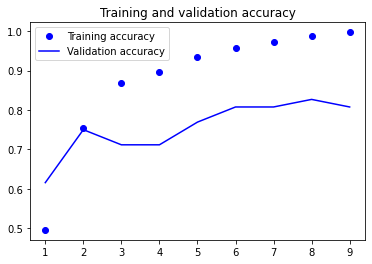

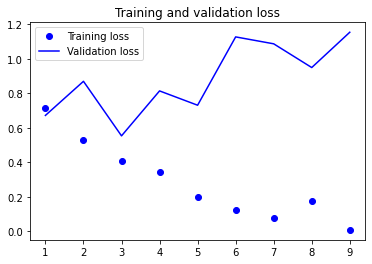

In [14]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Despues de ver las graficas con las epocas realizadas, podemos denotar que, , despues de solo unas  "pocas" epocas, podemos observar facilmente el como se realiza un overfitting, la cual se ve cuando se genera una brecha cada vez es mayor  entre el set de entrenamiento y de validacion. Esto se debio esperar, debido por la pequeña cantidad de imagenes en el entrenamiento como tambien en la validacion.

Si probamos la presicion del modelo contra el set de pruebo, los resultados, deberia ser no tan buenos, a como se debe que esperar.

In [15]:
test_model = keras.models.load_model("convnet_from_scratch")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}") #0.911  # ultima version 0.872

18/18 [==============================] - 1s 22ms/step - loss: 0.4662 - accuracy: 0.8056
Test accuracy: 0.806


sale una presicion alta, lo cual es bueno y malo al mismo tiempo, ya que nos da a conocer que si tiene buna buena presicion,pero debido a poca carga de imagenes que se tiene en los sets,este resultado con el set de prueba es seguro que tiene un overfitting alto , lo cual hay que pelear contra ello y solucionarlo para asi conseguir el resultado de presicion real.

# Data Augmentation

Visto lo anterior, el overfitting  visto se debe a que tiene muy pocas muestras de las que aprender dentro de los set, lo que le impide entrenar un modelo que pueda generalizarse a nuevos datos. Dados datos infinitos, su modelo estaría expuesto a todos los aspectos posibles de la distribución de datos en cuestión: nunca se sobreajustaría. El aumento de datos adopta el enfoque de generar más datos de entrenamiento a partir de muestras de entrenamiento existentes al aumentar las muestras a través de una serie de transformaciones aleatorias que producen imágenes de aspecto creíble. El objetivo es que, en el momento del entrenamiento, su modelo nunca vea exactamente la misma imagen dos veces. Esto ayuda a exponer el modelo a más aspectos de los datos para que pueda generalizarse mejor.

In [16]:
# Para generar un data augmentation de las imagenes que se tiene a la mano,
# lo realizamos de la siguienete manera:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(224,
                                  224,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


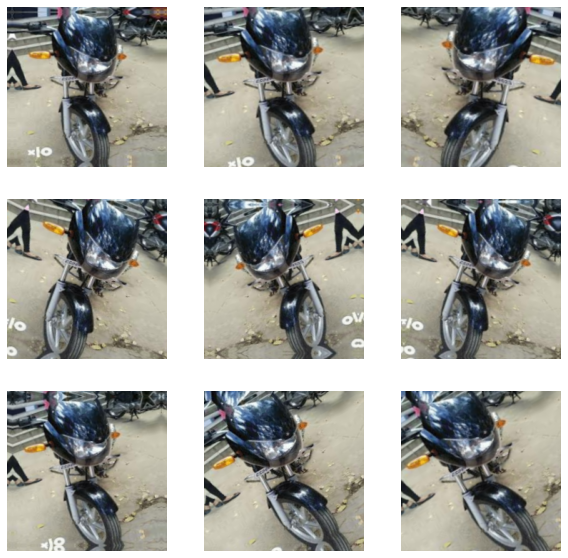

In [17]:
# checamos si realizado el data augmentacion de la siguiente manera con una 
# sola imagen
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images, training=True)
    ax = plt.subplot(3, 3, i + 1, xticks=[],yticks=[])
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# Liga de apoyo: https://stackoverflow.com/questions/71393952/unable-to-perform-data-augmentation-on-images-in-tensorflow

viendo lo anterior podemos ver la imagen usada original, mas su augmentaciones con diferentes angules y tamaños.

ya viendo que funciona, ahora lo podemos agregar a las capas de nuestro model anterior e intentarlo de nuevo el overfitting deberia ser significativamente menor, por lo que podemos entrenar durante un mayor número de épocas.

In [18]:
# creacion del nuevo modelo con data augmentation:
model = keras.Sequential([keras.Input(shape=(224, 224, 3)),
                          layers.Rescaling(1./255),
                          layers.RandomFlip("horizontal"), # Capa1 DA
                          layers.RandomRotation(0.1), # Capa2 DA
                          layers.RandomZoom(0.2),  # Capa3 DA
                          layers.Conv2D(filters=8, kernel_size=(5,5), activation="relu"),
                          layers.Conv2D(filters=8, kernel_size=(5,5), activation = "relu"),
                          layers.Conv2D(filters=16, kernel_size=(5,5), activation = "relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=16, kernel_size=(3,3), activation = "relu"),
                          layers.Conv2D(filters=16, kernel_size=(3,3), activation = "relu"),
                          layers.Conv2D(filters=32, kernel_size=(3,3), activation = "relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Flatten(),
                          layers.Dense(units= 120, activation = "relu"),
                          layers.Dropout(0.2),
                          layers.Dense(units= 90, activation = "relu"),
                          layers.Dense(units= 64, activation = "relu"),
                          layers.Dense(1, activation="sigmoid")])

model.summary()




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 8)       608       
                                                                 
 conv2d_7 (Conv2D)           (None, 216, 216, 8)       1608      
                                                      

In [19]:
# Copilamos el nuevo modelo
model.compile(loss="binary_crossentropy",
              #optimizer="rmsprop",
              metrics=["accuracy"])

Nuevamente, ya teniendo en modelo compilado, ahora ya esta listo para comenzar a entrenar el modelo con los datos ya preparados, lo cual agregamos la funcion callback para guadar  los mejores pesos del modelo en funcion al valor de perdida de la validacion.

In [20]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=40, # variable arbitraria
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/40
42/42 [==============================] - ETA: 0s - loss: 0.7522 - accuracy: 0.5429

42/42 [==============================] - 7s 118ms/step - loss: 0.7522 - accuracy: 0.5429 - val_loss: 0.6222 - val_accuracy: 0.7500
Epoch 2/40
42/42 [==============================] - ETA: 0s - loss: 0.5722 - accuracy: 0.7643

42/42 [==============================] - 5s 110ms/step - loss: 0.5722 - accuracy: 0.7643 - val_loss: 0.4619 - val_accuracy: 0.7885
Epoch 3/40
42/42 [==============================] - ETA: 0s - loss: 0.4185 - accuracy: 0.8357

42/42 [==============================] - 5s 111ms/step - loss: 0.4185 - accuracy: 0.8357 - val_loss: 0.4321 - val_accuracy: 0.8077
Epoch 4/40
42/42 [==============================] - 2s 50ms/step - loss: 0.3220 - accuracy: 0.8643 - val_loss: 0.9406 - val_accuracy: 0.7692
Epoch 5/40
42/42 [==============================] - ETA: 0s - loss: 0.3518 - accuracy: 0.8690

42/42 [==============================] - 5s 120ms/step - loss: 0.3518 - accuracy: 0.8690 - val_loss: 0.4313 - val_accuracy: 0.8269
Epoch 6/40
42/42 [==============================] - 2s 50ms/step - loss: 0.3324 - accuracy: 0.8857 - val_loss: 0.5123 - val_accuracy: 0.8654
Epoch 7/40
42/42 [==============================] - 2s 50ms/step - loss: 0.2930 - accuracy: 0.8952 - val_loss: 0.4869 - val_accuracy: 0.8269
Epoch 8/40
42/42 [==============================] - 2s 52ms/step - loss: 0.2754 - accuracy: 0.8952 - val_loss: 1.8783 - val_accuracy: 0.7692
Epoch 9/40
42/42 [==============================] - 2s 49ms/step - loss: 0.2863 - accuracy: 0.9167 - val_loss: 0.6020 - val_accuracy: 0.8462
Epoch 10/40
42/42 [==============================] - 2s 52ms/step - loss: 0.2488 - accuracy: 0.9119 - val_loss: 0.5238 - val_accuracy: 0.8654
Epoch 11/40
42/42 [==============================] - 2s 50ms/step - loss: 0.2092 - accuracy: 0.9238 - val_loss: 0.5236 - val_accuracy: 0.8654
Epoch 12/40
42/42 [==

42/42 [==============================] - 5s 107ms/step - loss: 0.2340 - accuracy: 0.9214 - val_loss: 0.3979 - val_accuracy: 0.8269
Epoch 14/40
42/42 [==============================] - 2s 52ms/step - loss: 0.1911 - accuracy: 0.9286 - val_loss: 1.0394 - val_accuracy: 0.7885
Epoch 15/40
42/42 [==============================] - 2s 50ms/step - loss: 0.2309 - accuracy: 0.9381 - val_loss: 0.6019 - val_accuracy: 0.8462
Epoch 16/40
42/42 [==============================] - 2s 51ms/step - loss: 0.1831 - accuracy: 0.9310 - val_loss: 0.7328 - val_accuracy: 0.8462
Epoch 17/40
42/42 [==============================] - 2s 50ms/step - loss: 0.1854 - accuracy: 0.9500 - val_loss: 0.5636 - val_accuracy: 0.8462
Epoch 18/40
42/42 [==============================] - 2s 52ms/step - loss: 0.1516 - accuracy: 0.9452 - val_loss: 0.5955 - val_accuracy: 0.8654
Epoch 19/40
41/42 [============================>.] - ETA: 0s - loss: 0.1877 - accuracy: 0.9463

42/42 [==============================] - 5s 115ms/step - loss: 0.1845 - accuracy: 0.9476 - val_loss: 0.3928 - val_accuracy: 0.9038
Epoch 20/40
42/42 [==============================] - 2s 51ms/step - loss: 0.1830 - accuracy: 0.9286 - val_loss: 0.4413 - val_accuracy: 0.8269
Epoch 21/40
42/42 [==============================] - 2s 50ms/step - loss: 0.1381 - accuracy: 0.9643 - val_loss: 0.5669 - val_accuracy: 0.8654
Epoch 22/40
42/42 [==============================] - 2s 50ms/step - loss: 0.1493 - accuracy: 0.9643 - val_loss: 0.6189 - val_accuracy: 0.8077
Epoch 23/40
42/42 [==============================] - 2s 52ms/step - loss: 0.1183 - accuracy: 0.9667 - val_loss: 1.0710 - val_accuracy: 0.8654
Epoch 24/40
42/42 [==============================] - 2s 49ms/step - loss: 0.1434 - accuracy: 0.9476 - val_loss: 0.6391 - val_accuracy: 0.8654
Epoch 25/40
42/42 [==============================] - 2s 51ms/step - loss: 0.1356 - accuracy: 0.9714 - val_loss: 0.5508 - val_accuracy: 0.8654
Epoch 26/40
42/42

## Revision del entrenamiento con data augmentation:

Ya una vez realizado lo anterior, nos toca revisar el como se comporto el modelo generado por medio de la siguiente grafica:

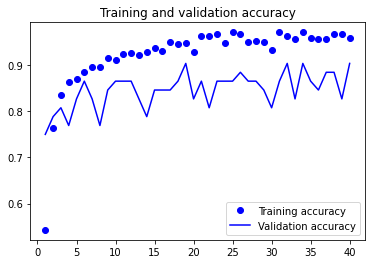

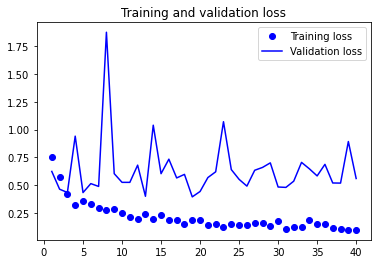

In [21]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Tomando en cuenta los resultados anteriores (las graficas sin data augmentation), estas muestra mejores resultado por las nuevas imagenes agregadas por data augmentation, un nuevo cambio y agregado de capas al modelo original, como tambien  el aumentos de epocas realizadas en el mismo, dando como resultado  un mejor comportamiento del modelo al momento de entrenarlo y dar una mejor validacion a como se presenta con anterioridad.


Finalmente, probamos la presicion del modelo contra el set de prueba, los resultados, deberia ser mejores que el anterior, a como se debe que esperar.

In [22]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}") # resultado: 0.944 # es mucho mejor que el anterior.
                                        # Ultimo resultado 0.900  # aun matiene una presicion mayor

18/18 [==============================] - 1s 21ms/step - loss: 0.3773 - accuracy: 0.9167
Test accuracy: 0.917


Nota: despues de generar la evualacion se realizara  (para la siguiente entrega) pruebas de prediccion y al final, recomendacion para mejorar el modelo aun mas deacuerdo a los resultados dados por dichas predicciones

# Conclusion
Ya una vez evaluada el modelo, podemos denotar que realmente el modelo de Deep Learning, funciona mejor de acuerdo con la nueva cantidad de imágenes realizadas por la aumentación datos que con las imágenes originales, dando una mejor precisión al momento de evaluar al mismo., como tambien da una precisión realista de acuerdo a la validación del set de entramiento y validación en base  a las épocas realizadas dentro del modelo.

Por último, una recomendación, para mejorar este código, será realizar diferentes aumentación de datos dentro del modelo en diferentes capaz para mejorar la clasificación y predicciones de este, como tambien generar una mayor cantidad de épocas para probar el mismo modelo y tener la mejor set de evaluación al momento de evaluar dicho modelo con el set de prueba y asi tener una mejor precisión al termino de la misma






# Prediccion:

Por ultimo tomamos una nueva imagen la cual no es parte del Modelo (cual es un avion) y generamos una prediccion en cuanto al modelo ya generado.

In [24]:
imageURL1= "https://drive.google.com/uc?export=view&id=12q7GPAt_G_Waqo5u7q7_Qx4H_PaXUCys"
sunflower_path = tf.keras.utils.get_file(
    "m1",
    origin=imageURL1,
    cache_subdir="/tmp",
)

img = tf.keras.utils.load_img(sunflower_path, target_size=(224, 224))

img_array = tf.keras.utils.img_to_array(img)

img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)

score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence.".format(
        class_names[np.argmax(score)], 100 * np.max(score)
    ))

1/1 [==============================] - 0s 16ms/step
This image most likely belongs to Bikes with a 100.00 percent confidence.


---

# Primera Retroalimentacion:

Tras haber trabajado en esta actividad  y haber revisado la retroalimentacion  y mis justifiaciones del codigo anterior son los siguientes:

1. En cuanto al momento que se arman los datasets del la convecion con la cual las fotos tiene nombre son muy variados, pero en general se encuentra concentradas en estas dos validaciones de nombre:

* images {numero n}.jpg
* download {numero n}.jpg

Lo cual da a conocer la gran 652 imagenes las cuales sencuentra en estas dos opciones de nombrambiento de imagenes, lo cual, las restantes tienen nombre unicos cada una de ellas, dando diferentes conveciones de nombre en cada una de las mismas, dando asi la diferencia entre las imagenes.

Una solucion a esto es nombrar de me manera manual cada una de las imagenes que no entras en las concentradas, sin embargo , al momento de realizar un nuevo dataset estos  se tendria que renombrar nuevamente de manera manual.

Dicho eso, en su momento solo conte unicamente a las dos instancias de nombramiento para por la dificultad de las diferentes nombrambientos y al encontrar estas concentraciones, decidi unicamente concentrarme en esas mismas dejando dentro mas de 3/4 del dataset original del dataset y usarlo para la actividad.


2. En cuanto la reduccion de los filtros dentro de las CNN, en su momento quise probar justo lo contrario dentro de los filtrado para ver principalmente como funciona si reduzco la profundizacion de los filtrados y ver como se comportaban los modelos con estas configuraciones, ahora bien, esto hice solo por probar y ver como se comportaba principalmente y luego revertir esa configuracion y tener un aumento de los filtros y asi tener una mejor profundizacion pero al momento de terminar la actividad se me olvido revertir estar configuracion  y ya en este entregable se lo ya deberian estar revertidos para la funcionalidad correctad de dichos modelos.

Por ultimo despues de estas justificacion se generar una clase con el mismo modelos vistos anteriormente con la funcionalidad de generar lo anterior en una sola celda , generar los graficos y luego generar una prediccion con nuevos datos
generar nuevas predicciones y graficos en base a los nuevos datos y modelos anteriores nuevamente entrenados, dicho eso, la clase y desplegables son los siguientes:



In [25]:
"""
NOTA: Lo primero hay que hacer antes de correr la clase, es correr la celda
de las librerias para que esta clase funcione.
Como tambien es necesario que se conecte a su drive donde se encuentra
las carpetas a usar para la clase
"""
drive.mount('/content/drive') 

%cd "/content/drive/MyDrive/Data"
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Data
Alcohol_Sales.csv                             IMDB-Movie-Data.csv
Animals.csv                                   iris.data
annotations/                                  iris.names
annotations.tar.gz                            kaggle.json
archive/                                      my_figure.png
Automobile.csv                                oxford_segmentation.keras
bodyfat.csv                                   purchases.csv
cars-vs-bikes.log                             purchases.json
convnet_from_scratch/                         sampleSubmission.csv
convnet_from_scratch_with_augmentation/       test1.zip
convnet_from_scratch_with_augmentation.keras  titanic.csv
digits/                                       train/
dogs-vs-cats.zip                              train_images/
fotos/                                        train.zip
ima

In [38]:
# Clase DeepLearning

class deeplearning:

  def __init__(self,original_path = '', new_path= '', train_set = tf.data.Dataset, test_set = tf.data.Dataset, val_set = tf.data.Dataset, model = keras.Sequential):
    # Paths
    self._original_path = original_path
    self._new_path = new_path

    # Datasets
    self._train_set = train_set
    self._test_set = test_set
    self._val_set = val_set

    #  Modelos
    self_model =keras.Sequential
  
  def get_new_paths(self, original_path, new_path):
    # Direcciones de directorios de imagenes
    original_dir = pathlib.Path(original_path)  # prueba : "archive"
                                                # direccion original para la agregacion 
                                                # de las subsets con las imagenes 
                                                # originales
                  
    new_base_dir = pathlib.Path(new_path)         # Prueba: "train_images"
                                                  # nueva carpeta donde se generaran
                                                  # los nuevos subsets
    self._original_path = original_dir
    self._new_path  = new_base_dir

  # Creacion de pruebas
  def make_subset_test(self, subset_name, start_index, end_index):
    for category in ("Bikes", "Cars"):
        tra = "train"
        dir = self._new_path / subset_name / category
        os.makedirs(dir)
        fnames = [f"download ({i}).jpg"
                  for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=self._original_path/ category/tra/fname,
                            dst=dir /fname)
  # MODIFICAR A GENERAL
  def make_subset_train_val(self, subset_name, start_index, end_index):   
    for category in ("Bikes", "Cars"):
        tra = "train"
        dir = self._new_path / subset_name / category
        os.makedirs(dir)
        fnames = [f"images ({i}).jpg"
                  for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=self._original_path/ category/tra/fname,
                            dst=dir /fname)

  def make_datasets(self):
    # Directorio de entrenamiento
    self._train_set = image_dataset_from_directory(
      self._new_path / "train",
      image_size=(224, 224),
      batch_size=10)
    # Directorio de validacion
    self._val_set = image_dataset_from_directory(
      self._new_path / "validation",
      image_size=(224, 224),
      batch_size=10)
    # directorio de prueba
    self._test_set = image_dataset_from_directory(
      self._new_path / "test",
      image_size=(224, 224),
      batch_size=10)
    
    # entrenamiento
    for data_batch, labels_batch in self._train_set:
      print("data batch shape(Train):", data_batch.shape)
      print("labels batch shape(Train):", labels_batch.shape)
      break
    print('/-----------------------/')
    # validacion
    for data_batch, labels_batch in self._val_set:
      print("data batch shape(Validation):", data_batch.shape)
      print("labels batch shape(Validation):", labels_batch.shape)
      break
    print('/-----------------------/')
    # Prueba
    for data_batch, labels_batch in self._test_set:
      print("data batch shape(Test):", data_batch.shape)
      print("labels batch shape(Test):", labels_batch.shape)
      break
    print('/-----------------------/')
    # Nombre de las Clases
    class_names = self._train_set.class_names
    print(class_names)
    print('/-----------------------/')
    
  # Entrenamiento de modelo sin aumentacion de datos
  def model_no_data_augmentation(self):
    #Creacion del Modelo
    model = keras.Sequential([keras.Input(shape=(224, 224, 3)),
                          layers.Rescaling(1./255),
                          layers.Conv2D(filters=8, kernel_size=(5,5), activation="relu"),
                          layers.Conv2D(filters=8, kernel_size=(5,5), activation = "relu"),
                          layers.Conv2D(filters=16, kernel_size=(5,5), activation = "relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=16, kernel_size=(3,3), activation = "relu"),
                          layers.Conv2D(filters=32, kernel_size=(3,3), activation = "relu"),
                          layers.Conv2D(filters=32, kernel_size=(3,3), activation = "relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Flatten(),
                          layers.Dense(units= 120, activation = "relu"),
                          layers.Dropout(0.1),
                          layers.Dense(units= 90, activation = "relu"),
                          layers.Dense(units= 64, activation = "relu"),
                          layers.Dense(1, activation="sigmoid")])
    # Copilacion del Modelo
    model.compile(loss="binary_crossentropy",
                  #optimizer="rmsprop",
                  metrics=["accuracy"])
    
    # Entrenamiento del Modelo
    callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch",
        save_best_only=True,
        monitor="val_loss")
    ]
    print('/-----------------------/')
    print('Entrenamiento del Modelo sin aumentacion de datos')
    history = model.fit(
              self._train_set,
              epochs=9, # variable arbitraria  (aunque debe ser menor que las epocas usadas en el modelo con data augmentation)
              validation_data=self._val_set,
              callbacks=callbacks)
    print('/-----------------------/')
    print('Evaluacion del Modelo')
    test_model = keras.models.load_model("convnet_from_scratch")
    test_loss, test_acc = test_model.evaluate(test_dataset)
    print(f"Test accuracy: {test_acc:.3f}") #0.911  # ultima version 0.872
    print('/-----------------------/')
    # Revision y graficacacion del Modelo:
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(accuracy) + 1)
    plt.plot(epochs, accuracy, "bo", label="Training accuracy")
    plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()
    plt.show()


  # Entrenamiento de modelo sin aumentacion de datos
  def model_with_data_augmentation(self):
    # creacion del nuevo modelo con data augmentation:
    model = keras.Sequential([keras.Input(shape=(224, 224, 3)),
                          layers.Rescaling(1./255),
                          layers.RandomFlip("horizontal"), # Capa1 DA
                          layers.RandomRotation(0.1), # Capa2 DA
                          layers.RandomZoom(0.2),  # Capa3 DA
                          layers.Conv2D(filters=8, kernel_size=(5,5), activation="relu"),
                          layers.Conv2D(filters=8, kernel_size=(5,5), activation = "relu"),
                          layers.Conv2D(filters=16, kernel_size=(5,5), activation = "relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=16, kernel_size=(3,3), activation = "relu"),
                          layers.Conv2D(filters=16, kernel_size=(3,3), activation = "relu"),
                          layers.Conv2D(filters=32, kernel_size=(3,3), activation = "relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Flatten(),
                          layers.Dense(units= 120, activation = "relu"),
                          layers.Dropout(0.2),
                          layers.Dense(units= 90, activation = "relu"),
                          layers.Dense(units= 64, activation = "relu"),
                          layers.Dense(1, activation="sigmoid")])
    
    # Copilamos el nuevo modelo
    model.compile(loss="binary_crossentropy",
              #optimizer="rmsprop",
              metrics=["accuracy"])
    callbacks = [
              keras.callbacks.ModelCheckpoint(
              filepath="convnet_from_scratch_with_augmentation",
              save_best_only=True,
              monitor="val_loss")
              ]     
    print('/-----------------------/')
    print('Entrenamiento del Modelo con aumentacion de datos')
    history = model.fit(
            train_dataset,
            epochs=40, # variable arbitraria
            validation_data=validation_dataset,
            callbacks=callbacks)
    self._model = model
    print('/-----------------------/')
    print('Evaluacion del Modelo')
    test_model = keras.models.load_model("convnet_from_scratch")
    test_loss, test_acc = test_model.evaluate(test_dataset)
    print(f"Test accuracy: {test_acc:.3f}") #0.911  # ultima version 0.872
    print('/-----------------------/')
    
    # Revision y graficacacion del Modelo:
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(accuracy) + 1)
    plt.plot(epochs, accuracy, "bo", label="Training accuracy")
    plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()
    plt.show()

  # Funcion de Prediccion:
  def prediction(self):
    imageURL1= "https://drive.google.com/uc?export=view&id=12q7GPAt_G_Waqo5u7q7_Qx4H_PaXUCys"
    sunflower_path = tf.keras.utils.get_file(
        "m1",
        origin=imageURL1,
        cache_subdir="/tmp",
    )

    img = tf.keras.utils.load_img(sunflower_path, target_size=(224, 224))

    img_array = tf.keras.utils.img_to_array(img)

    img_array = tf.expand_dims(img_array, 0)

    predictions = self._model.predict(img_array)

    score = tf.nn.softmax(predictions[0])
    print('/-----------------------/')
    print('Prediccion con una imagen externa')
    print( "Esta imagen problamente pertenece al set {}, con un porcentaje de confianza de:{:.2f}".format(
        class_names[np.argmax(score)], 100 * np.max(score)
    ))
    
  # Funcion principal
  # Corre todo las funciones de la clase.
  def start_main(self,original, nueva_carpeta):
    # Pasamos los path a la carpeta original y la nueva a crear
    deeplearning.get_new_paths(self, original, nueva_carpeta)

    # Creamos los sets de entrenamiento, prueba y validacion en drive
    deeplearning.make_subset_train_val(self, "train", start_index=1, end_index=211) # creacion del set de entrenamiento
    deeplearning.make_subset_test(self, "test", start_index=1, end_index=91)  # creacion del set de prueba
    deeplearning.make_subset_train_val(self, "validation", start_index=214, end_index=240)  # creacion del set de validacion

    # Creacion de datasets en la clase
    deeplearning.make_datasets(self)

    # Entrenamiento, despligue y revision de entrenamiento sin data  augmentation
    deeplearning.model_no_data_augmentation(self)

    # Entrenamineto, despliego y revision de entrenamiento con data augmentation
    deeplearning.model_with_data_augmentation(self)

    # Finalmente realizamos la prediccion
    deeplearning.prediction(self)

Found 420 files belonging to 2 classes.
Found 52 files belonging to 2 classes.
Found 180 files belonging to 2 classes.
data batch shape(Train): (10, 224, 224, 3)
labels batch shape(Train): (10,)
/-----------------------/
data batch shape(Validation): (10, 224, 224, 3)
labels batch shape(Validation): (10,)
/-----------------------/
data batch shape(Test): (10, 224, 224, 3)
labels batch shape(Test): (10,)
/-----------------------/
['Bikes', 'Cars']
/-----------------------/
/-----------------------/
Entrenamiento del Modelo sin aumentacion de datos
Epoch 1/9
41/42 [============================>.] - ETA: 0s - loss: 0.7844 - accuracy: 0.5268

42/42 [==============================] - 5s 83ms/step - loss: 0.7827 - accuracy: 0.5214 - val_loss: 0.6902 - val_accuracy: 0.5769
Epoch 2/9
41/42 [============================>.] - ETA: 0s - loss: 0.7081 - accuracy: 0.6585

42/42 [==============================] - 5s 109ms/step - loss: 0.7054 - accuracy: 0.6619 - val_loss: 0.5470 - val_accuracy: 0.7115
Epoch 3/9
42/42 [==============================] - 2s 41ms/step - loss: 0.3906 - accuracy: 0.8476 - val_loss: 0.5679 - val_accuracy: 0.7692
Epoch 4/9
42/42 [==============================] - 2s 39ms/step - loss: 0.3373 - accuracy: 0.8738 - val_loss: 0.6026 - val_accuracy: 0.8269
Epoch 5/9
42/42 [==============================] - 2s 39ms/step - loss: 0.3405 - accuracy: 0.9024 - val_loss: 0.5610 - val_accuracy: 0.8269
Epoch 6/9
42/42 [==============================] - 2s 42ms/step - loss: 0.1405 - accuracy: 0.9476 - val_loss: 0.6525 - val_accuracy: 0.7692
Epoch 7/9
42/42 [==============================] - 2s 39ms/step - loss: 0.1298 - accuracy: 0.9500 - val_loss: 0.6915 - val_accuracy: 0.8654
Epoch 8/9
42/42 [==============================] - 2s 39ms/step - loss: 0.1171 - accuracy: 0.9738 - val_loss: 0.8556 - val_accuracy: 0.8654
Epoch 9/9
42/42 [============

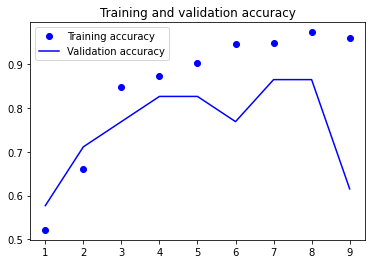

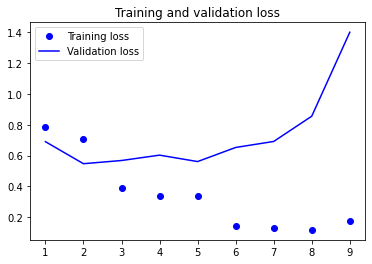

/-----------------------/
Entrenamiento del Modelo con aumentacion de datos
Epoch 1/40
41/42 [============================>.] - ETA: 0s - loss: 0.7219 - accuracy: 0.5829

42/42 [==============================] - 7s 117ms/step - loss: 0.7208 - accuracy: 0.5810 - val_loss: 0.5932 - val_accuracy: 0.7885
Epoch 2/40
42/42 [==============================] - ETA: 0s - loss: 0.5369 - accuracy: 0.7952

42/42 [==============================] - 5s 116ms/step - loss: 0.5369 - accuracy: 0.7952 - val_loss: 0.4561 - val_accuracy: 0.7500
Epoch 3/40
42/42 [==============================] - 2s 53ms/step - loss: 0.5072 - accuracy: 0.7905 - val_loss: 0.4564 - val_accuracy: 0.8269
Epoch 4/40
42/42 [==============================] - ETA: 0s - loss: 0.3448 - accuracy: 0.8738

42/42 [==============================] - 5s 123ms/step - loss: 0.3448 - accuracy: 0.8738 - val_loss: 0.4451 - val_accuracy: 0.7885
Epoch 5/40
42/42 [==============================] - 2s 54ms/step - loss: 0.3445 - accuracy: 0.8786 - val_loss: 0.4629 - val_accuracy: 0.8269
Epoch 6/40
42/42 [==============================] - 2s 50ms/step - loss: 0.2962 - accuracy: 0.8881 - val_loss: 0.5811 - val_accuracy: 0.8077
Epoch 7/40
42/42 [==============================] - 2s 51ms/step - loss: 0.2832 - accuracy: 0.8786 - val_loss: 0.5190 - val_accuracy: 0.8077
Epoch 8/40
42/42 [==============================] - 2s 51ms/step - loss: 0.2826 - accuracy: 0.8810 - val_loss: 0.6292 - val_accuracy: 0.8077
Epoch 9/40
42/42 [==============================] - 2s 50ms/step - loss: 0.2500 - accuracy: 0.9262 - val_loss: 0.5755 - val_accuracy: 0.8077
Epoch 10/40
42/42 [==============================] - 2s 50ms/step - loss: 0.2337 - accuracy: 0.9262 - val_loss: 1.2709 - val_accuracy: 0.7885
Epoch 11/40
42/42 [===

42/42 [==============================] - 5s 115ms/step - loss: 0.2031 - accuracy: 0.9286 - val_loss: 0.4442 - val_accuracy: 0.8654
Epoch 20/40
42/42 [==============================] - 2s 54ms/step - loss: 0.1520 - accuracy: 0.9405 - val_loss: 1.0615 - val_accuracy: 0.8269
Epoch 21/40
42/42 [==============================] - 2s 49ms/step - loss: 0.2063 - accuracy: 0.9262 - val_loss: 0.5036 - val_accuracy: 0.7885
Epoch 22/40
42/42 [==============================] - 2s 54ms/step - loss: 0.1347 - accuracy: 0.9595 - val_loss: 0.6163 - val_accuracy: 0.8077
Epoch 23/40
42/42 [==============================] - ETA: 0s - loss: 0.2880 - accuracy: 0.9214

42/42 [==============================] - 5s 117ms/step - loss: 0.2880 - accuracy: 0.9214 - val_loss: 0.4098 - val_accuracy: 0.8269
Epoch 24/40
42/42 [==============================] - 2s 53ms/step - loss: 0.1555 - accuracy: 0.9524 - val_loss: 0.5329 - val_accuracy: 0.8077
Epoch 25/40
42/42 [==============================] - 2s 53ms/step - loss: 0.1831 - accuracy: 0.9405 - val_loss: 0.4928 - val_accuracy: 0.8654
Epoch 26/40
42/42 [==============================] - 2s 49ms/step - loss: 0.1680 - accuracy: 0.9310 - val_loss: 0.7559 - val_accuracy: 0.8462
Epoch 27/40
42/42 [==============================] - 2s 51ms/step - loss: 0.1203 - accuracy: 0.9595 - val_loss: 0.6533 - val_accuracy: 0.8654
Epoch 28/40
42/42 [==============================] - 2s 51ms/step - loss: 0.1581 - accuracy: 0.9571 - val_loss: 0.8020 - val_accuracy: 0.8269
Epoch 29/40
42/42 [==============================] - 3s 56ms/step - loss: 0.1453 - accuracy: 0.9548 - val_loss: 0.4304 - val_accuracy: 0.7885
Epoch 30/40
42/42

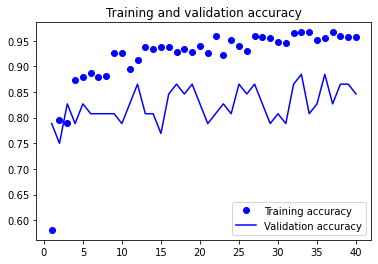

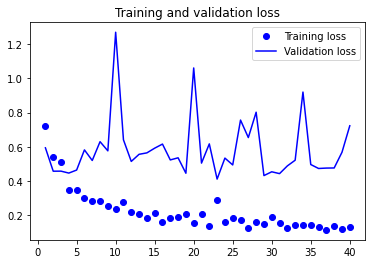

1/1 [==============================] - 0s 96ms/step
/-----------------------/
Prediccion con una imagen externa
Esta imagen problamente pertenece al set Bikes, con un porcentaje de confianza de:100.00


In [40]:
# original : "archive"
# nuevo: "train_images1"

# Le preguntamos al usuario el nombre de las carpetas
#original = input("cual es la carpeta donde se encuentra tus fotos de entrenamiento: ")
#nueva_carpeta = input("Como quieres que se llame la nueva carpeta donde se guardara los nuevos sets: ")

# Prueba (Solo para probar)
original = "archive"
nueva_carpeta = "train_images2"

# Llamamos a la clase y la funcion  start_main
x = deeplearning()
x.start_main(original, nueva_carpeta)
